In [16]:
import sklearn as sklean
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [17]:
import datetime as dt
import re
import squarify

In [18]:
cus_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Customer_info.csv",sep=',')
cus_df.head(3)
cus_df

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [19]:
dis_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Discount_info.csv",sep=',')
dis_df

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [20]:
mar_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Marketing_info.csv",sep=',')
mar_df.head(3)
mar_df

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [21]:
on_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Onlinesales_info.csv",sep=',')
on_df.head(3)
on_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [22]:
tax_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Tax_info.csv",sep=',')
tax_df


,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [23]:
cus_df2=cus_df
on_df2=on_df
tax_df2=tax_df
mar_df2=mar_df
dis_df2=dis_df

In [41]:
sales_test2['총_구매금액']=sales_test2['평균금액']*sales_test2['수량']

In [40]:
group_df = on_df2.groupby('거래날짜')['총_구매금액'].sum()

on_group_df = pd.DataFrame(group_df).reset_index()

print(on_group_df)

           거래날짜    총_구매금액
0    2019-01-01   7380.49
1    2019-01-02  13438.47
2    2019-01-03  23834.21
3    2019-01-04  16603.41
4    2019-01-05  17373.19
..          ...       ...
360  2019-12-27  13661.59
361  2019-12-28  10994.42
362  2019-12-29  12011.27
363  2019-12-30   8068.47
364  2019-12-31  10148.32

[365 rows x 2 columns]


In [42]:
mar_df2['거래날짜']=mar_df2['날짜']
mar_df2 = mar_df2.drop('날짜', axis=1)


In [43]:
mar_on_cor = pd.merge(on_group_df, mar_df2, how='inner', on='거래날짜')
mar_on_cor = mar_on_cor.sort_values(by='거래날짜', ascending=True)
mar_on_cor = mar_on_cor.reset_index(drop=True)
mar_on_cor['마케팅비용']=mar_on_cor['오프라인비용']+mar_on_cor['온라인비용']
mar_on_cor

,거래날짜,총_구매금액,오프라인비용,온라인비용,마케팅비용
0,2019-01-01,7380.49,4500,2424.50,6924.50
1,2019-01-02,13438.47,4500,3480.36,7980.36
2,2019-01-03,23834.21,4500,1576.38,6076.38
3,2019-01-04,16603.41,4500,2928.55,7428.55
4,2019-01-05,17373.19,4500,4055.30,8555.30
...,...,...,...,...,...
360,2019-12-27,13661.59,4000,3396.87,7396.87
361,2019-12-28,10994.42,4000,3246.84,7246.84
362,2019-12-29,12011.27,4000,2546.58,6546.58
363,2019-12-30,8068.47,4000,674.31,4674.31


<Axes: xlabel='총_구매금액', ylabel='마케팅비용'>

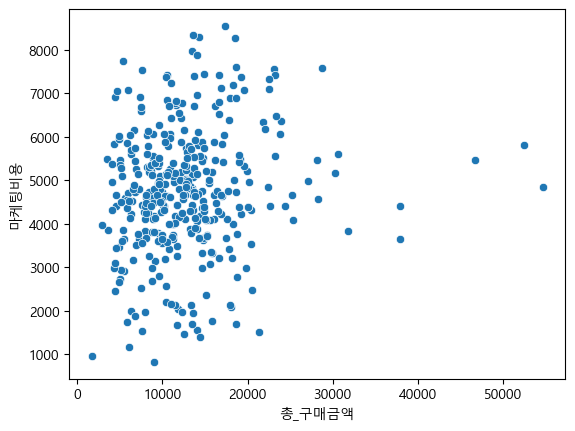

In [44]:
sns.scatterplot(data=mar_on_cor, x= '총_구매금액',y='마케팅비용')

In [29]:
on_df2['총_구매금액']=on_df2['평균금액']*on_df2['수량']

In [28]:
sales_df1= pd.merge(on_df2,tax_df2, how='outer',on='제품카테고리')
sales_df1 = sales_df1.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_df1 = sales_df1.reset_index(drop=True)
sales_df1.info()
sales_df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   GST     52924 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.0+ MB


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1,61.89,6.5,Clicked,0.18
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1,16.50,6.5,Clicked,0.18
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1,14.02,6.5,Clicked,0.18
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1,14.02,6.5,Used,0.18
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1,15.67,6.5,Clicked,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1,3.47,6.5,Used,0.18
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1,16.30,6.5,Used,0.18
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,0.10
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5,80.52,6.5,Clicked,0.10


In [32]:
def pur_day(a):
    match = re.match(r'^2019-(\d{2})', a)
    if match:
        month = int(match.group(1))
        return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month - 1]
    else:
        return 'null'

sales_df1['거래월'] = sales_df1['거래날짜'].apply(pur_day)


In [33]:
dis_df2['거래월']=dis_df2['월']

In [34]:
sales_test1 = pd.merge(sales_df1, dis_df2, how='outer', on=['제품카테고리','거래월'])
sales_test1 = sales_test1.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_test1 = sales_test1.reset_index(drop=True)
sales_test1 = sales_test1.dropna(subset=['고객ID'])
sales_test1

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,거래월,월,쿠폰코드,할인율
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,Jan,SALE10,10.0
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,Dec,SALE30,30.0
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,Dec,SALE30,30.0
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,Dec,ELEC30,30.0
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,Dec,ELEC30,30.0


In [35]:
sales_test2 = pd.merge(sales_test1, cus_df2, how='inner', on=['고객ID'])
sales_test2 = sales_test2.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_test2 = sales_test2.reset_index(drop=True)
sales_test2 = sales_test2.drop('거래월', axis=1)
sales_test2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19


In [36]:
sales_test2['총_구매금액']=sales_test2['평균금액']*sales_test2['수량']

In [37]:
sales_test2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,61.89
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,16.50
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,15.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,3.47
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,16.30
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,151.88
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,402.60


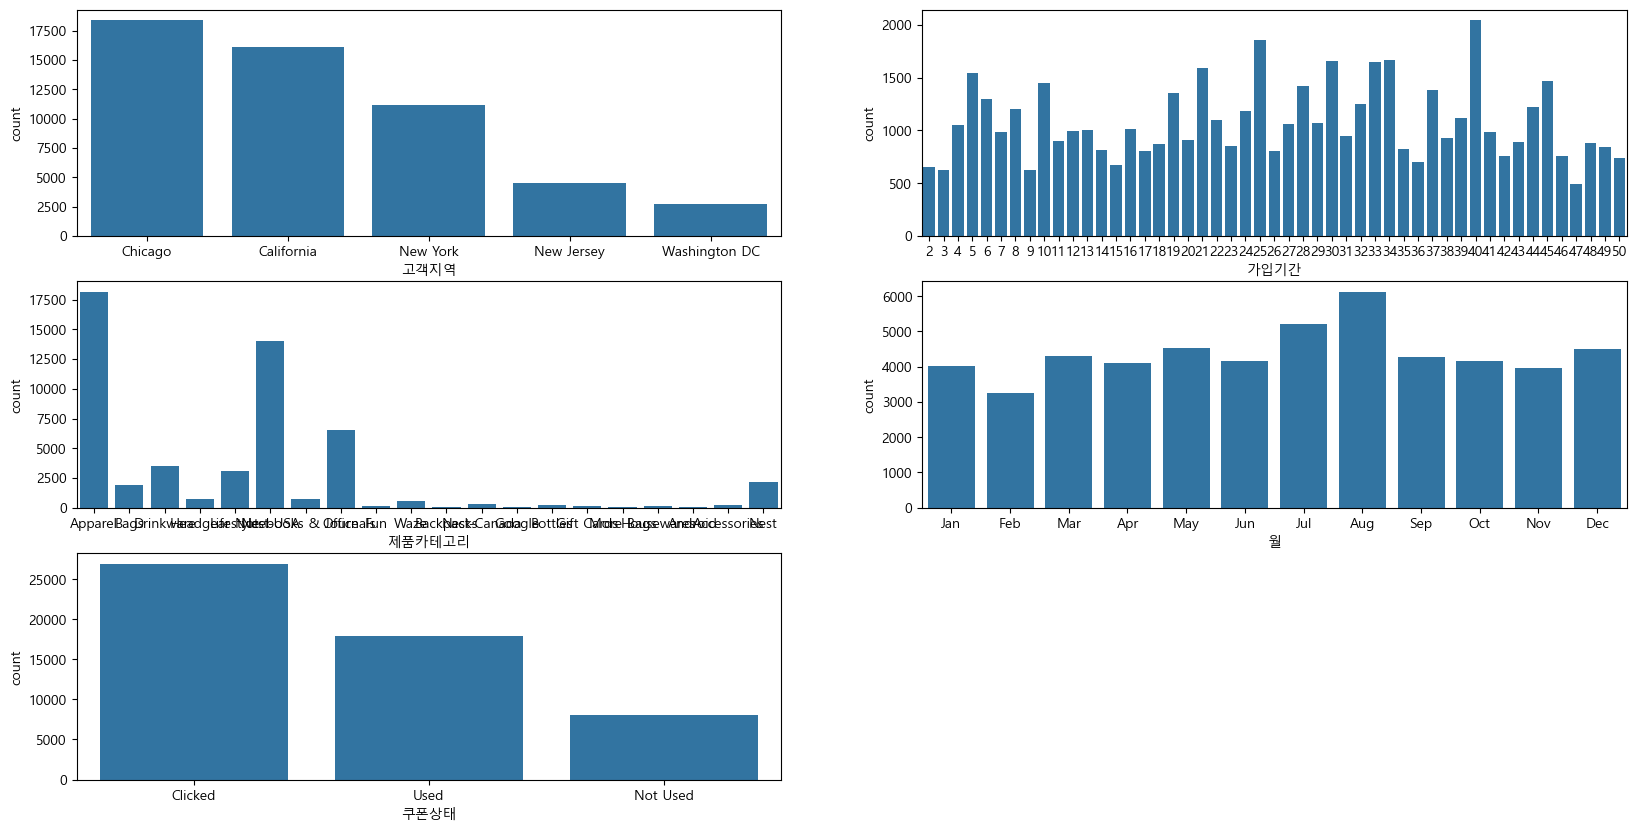

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
sns.countplot(data=sales_test2, x='고객지역')
plt.subplot(3, 2, 2)
sns.countplot(data=sales_test2, x='가입기간')
plt.subplot(3, 2, 3)
sns.countplot(data=sales_test2, x='제품카테고리')
plt.subplot(3, 2, 4)
sns.countplot(data=sales_test2, x='월')
plt.subplot(3, 2, 5)
sns.countplot(data=sales_test2, x='쿠폰상태')

plt.show()
sales_test2['제품카테고리'].value_counts()


In [45]:
sales_test3=sales_test2

In [ ]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    sales_test3 = dataframe.copy()
    sales_test3["recency_score"] = pd.qcut(sales_test3["recency"], 5, labels=[5, 4, 3, 2, 1])
    sales_test3["frequency_score"] = pd.qcut(
        sales_test3["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    sales_test3["monetary_score"] = pd.qcut(sales_test3["monetary"], 5, labels=[1, 2, 3, 4, 5])
    sales_test3["RFM_SCORE"] = sales_test3["recency_score"].astype(str) + sales_test3["frequency_score"].astype(
        str
    )

    return sales_test3

rfm = get_rfm_scores(rfm)

In [ ]:
rfm['mean']=rfm['monetary']/rfm['frequency']
rfm

,고객ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,mean,segment
0,USER_0000,108,1,30.99,3,1,1,31,30.990000,이탈 가능성
1,USER_0001,60,31,13834.90,4,5,5,45,446.287097,충성 고객
2,USER_0002,74,8,1442.12,4,2,3,42,180.265000,충성 잠재
3,USER_0003,18,11,1360.07,5,3,3,53,123.642727,충성 잠재
4,USER_0004,108,13,1442.47,3,3,3,33,110.959231,주의 필요
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,271,3,544.34,1,1,2,11,181.446667,이탈
1464,USER_1464,88,19,2363.05,4,4,3,44,124.371053,충성 고객
1465,USER_1465,195,2,101.56,2,1,1,21,50.780000,이탈
1466,USER_1466,70,1,298.00,4,1,1,41,298.000000,유망 고객


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='monetary'>

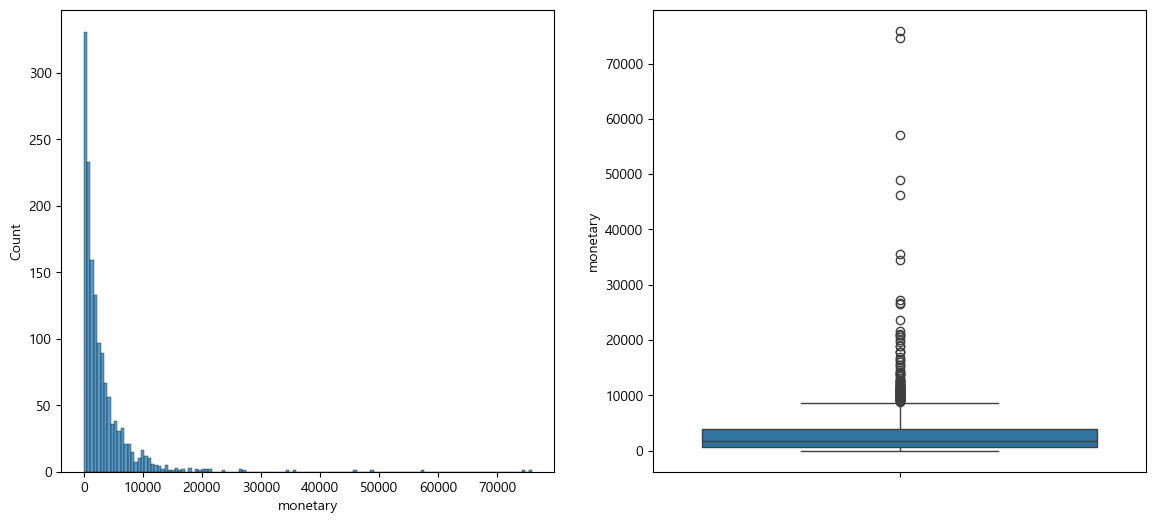

In [ ]:
# fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
# sns.histplot(data=rfm, x='monetary', ax=ax[0],legend=False)
# sns.boxplot(data=rfm, y='monetary', ax=ax[1],legend=False)

In [46]:
sales_test3

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,61.89
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,16.50
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,15.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,3.47
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,16.30
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,151.88
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,402.60


1.구매 금액 / 구매 건수 비교

In [50]:
sales_test3.groupby('제품카테고리')['총_구매금액'].sum().sort_values(ascending=False)

제품카테고리
Nest-USA                2554202.39
Apparel                  591145.80
Nest                     518193.50
Office                   276794.40
Drinkware                200707.83
Bags                     151314.43
Notebooks & Journals     107085.96
Lifestyle                 74385.70
Nest-Canada               70910.40
Headgear                  53471.44
Gift Cards                19533.82
Google                     9420.47
Backpacks                  8772.69
Accessories                7295.88
Bottles                    6923.65
Waze                       6311.94
Fun                        6029.01
Housewares                 4637.32
More Bags                  2946.96
Android                     711.03
Name: 총_구매금액, dtype: float64

In [57]:
sales_test3['제품카테고리'].value_counts()


제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [58]:
sales_test3.groupby('제품카테고리')['평균금액'].sum().sort_values(ascending=False)

제품카테고리
Nest-USA                1742262.21
Nest                     426897.92
Apparel                  358695.32
Bags                      56141.56
Nest-Canada               49846.11
Drinkware                 37257.28
Office                    24554.09
Gift Cards                17706.76
Headgear                  12243.19
Lifestyle                 11935.36
Notebooks & Journals       8807.12
Backpacks                  7124.13
Waze                       3660.75
Accessories                1921.39
Google                     1726.85
Fun                        1079.01
Bottles                     921.17
More Bags                   909.74
Android                     683.85
Housewares                  251.39
Name: 평균금액, dtype: float64

In [59]:
sales_test3.groupby('제품카테고리')['수량'].sum().sort_values(ascending=False)

제품카테고리
Office                  88383.0
Apparel                 32438.0
Drinkware               30501.0
Lifestyle               24881.0
Nest-USA                21430.0
Bags                    15273.0
Notebooks & Journals     9556.0
Headgear                 3533.0
Nest                     2837.0
Housewares               2484.0
Bottles                  2090.0
Waze                     1144.0
Accessories              1097.0
Fun                       834.0
Google                    575.0
Nest-Canada               469.0
Gift Cards                206.0
More Bags                 144.0
Backpacks                 113.0
Android                    45.0
Name: 수량, dtype: float64

In [79]:
total_purchase = sales_test3.groupby('제품카테고리')['총_구매금액'].sum().sort_values(ascending=False).reset_index()
category_count = sales_test3['제품카테고리'].value_counts().reset_index()
average_amount = sales_test3.groupby('제품카테고리')['평균금액'].sum().sort_values(ascending=False).reset_index()
quantity_sum = sales_test3.groupby('제품카테고리')['수량'].sum().sort_values(ascending=False).reset_index()

category_count.set_index('제품카테고리', inplace=True)

cate_table1 = pd.merge(total_purchase, category_count, left_on='제품카테고리', right_index=True, how='outer')
cate_table1 = pd.merge(cate_table1, average_amount, on='제품카테고리', how='outer')
cate_table1 = pd.merge(cate_table1, quantity_sum, on='제품카테고리', how='outer')

cate_table1.columns = ['제품카테고리', '총_구매금액', '카테고리별_구매건수', '총_평균금액', '총_수량']

cate_table1

,제품카테고리,총_구매금액,카테고리별_구매건수,총_평균금액,총_수량
0,Accessories,7295.88,234,1921.39,1097.0
1,Android,711.03,43,683.85,45.0
2,Apparel,591145.80,18126,358695.32,32438.0
3,Backpacks,8772.69,89,7124.13,113.0
4,Bags,151314.43,1882,56141.56,15273.0
5,Bottles,6923.65,268,921.17,2090.0
6,Drinkware,200707.83,3483,37257.28,30501.0
7,Fun,6029.01,160,1079.01,834.0
8,Gift Cards,19533.82,159,17706.76,206.0
9,Google,9420.47,105,1726.85,575.0


In [85]:
cate_table1['평균_구매갯수'] =(cate_table1['총_수량']/cate_table1['카테고리별_구매건수']).round(1)
cate_table1


,제품카테고리,총_구매금액,카테고리별_구매건수,총_평균금액,총_수량,평균_구매갯수
0,Accessories,7295.88,234,1921.39,1097.0,4.7
1,Android,711.03,43,683.85,45.0,1.0
2,Apparel,591145.80,18126,358695.32,32438.0,1.8
3,Backpacks,8772.69,89,7124.13,113.0,1.3
4,Bags,151314.43,1882,56141.56,15273.0,8.1
5,Bottles,6923.65,268,921.17,2090.0,7.8
6,Drinkware,200707.83,3483,37257.28,30501.0,8.8
7,Fun,6029.01,160,1079.01,834.0,5.2
8,Gift Cards,19533.82,159,17706.76,206.0,1.3
9,Google,9420.47,105,1726.85,575.0,5.5


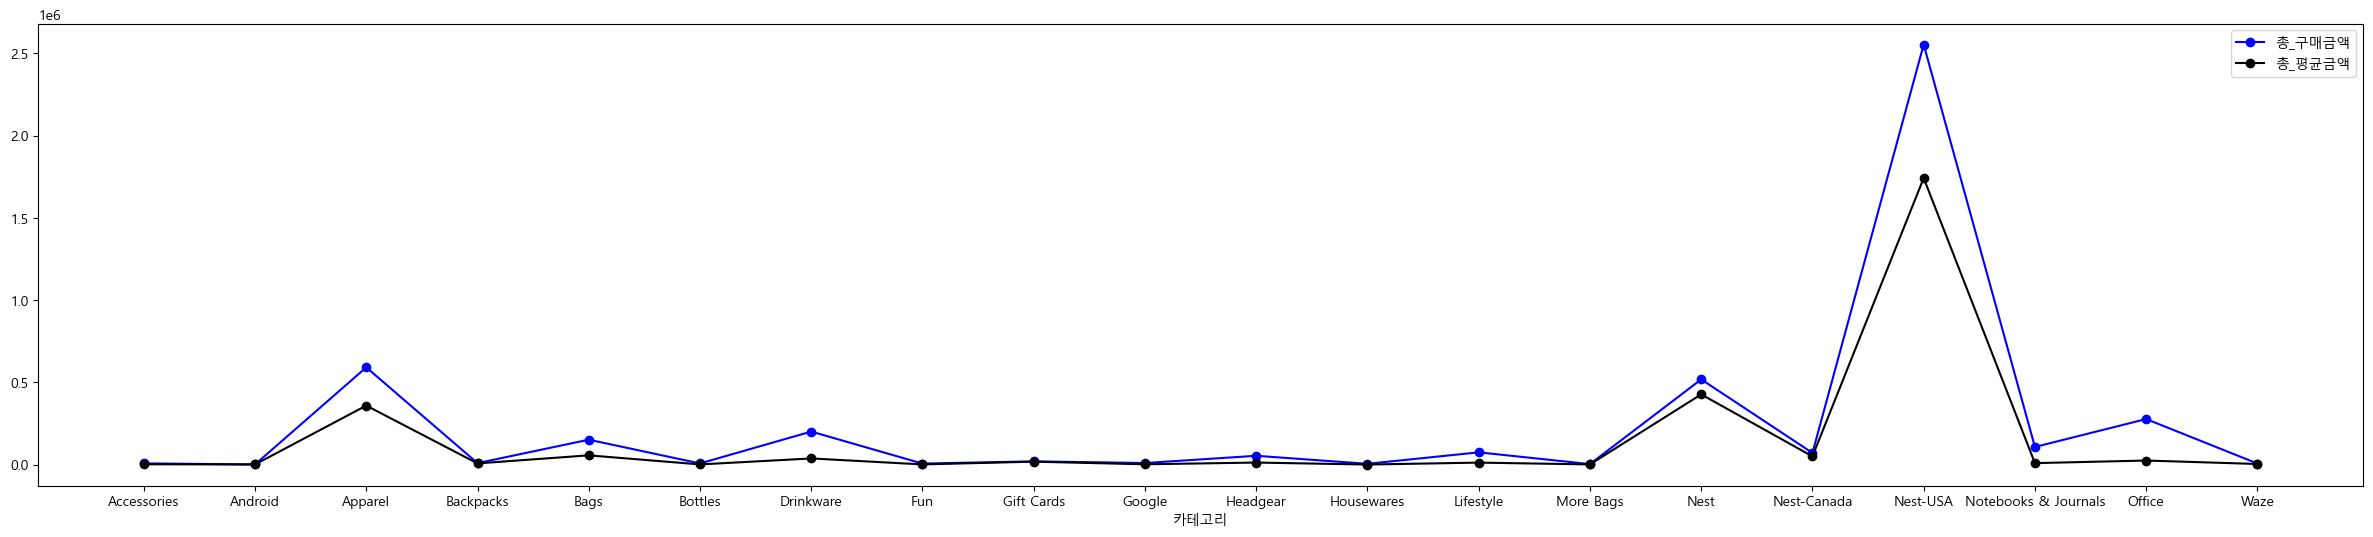

In [78]:
plt.figure(figsize=(30,6))

plt.plot(cate_table1['제품카테고리'],cate_table1['총_구매금액'],color='blue',linestyle='-',marker='o',label='총_구매금액')
plt.plot(cate_table1['제품카테고리'],cate_table1['총_평균금액'],color='black',linestyle='-',marker='o',label='총_평균금액')

plt.legend()

plt.xlabel('카테고리')

plt.show()

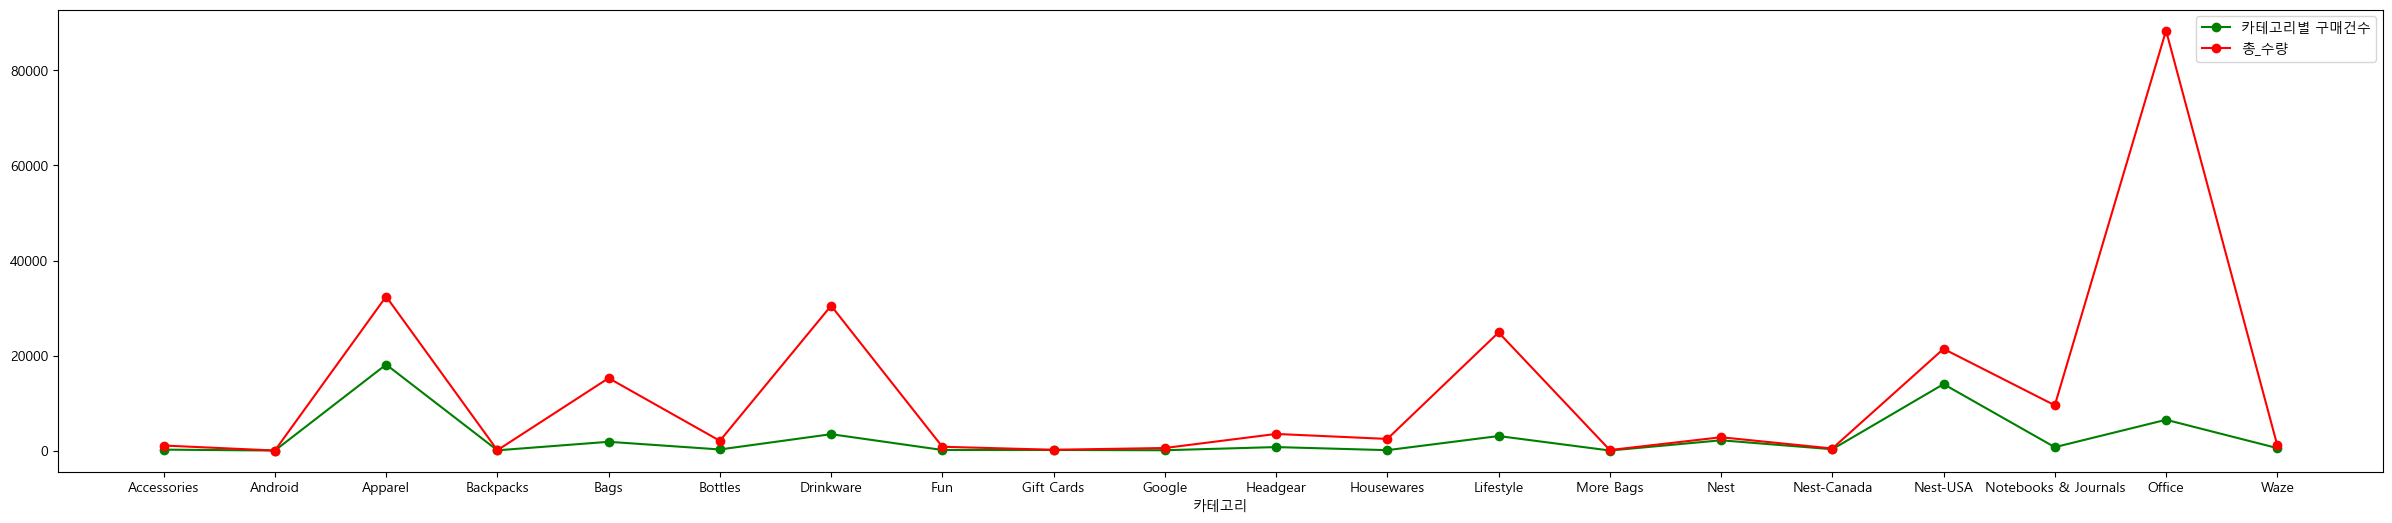

In [77]:
plt.figure(figsize=(30,6))

plt.plot(cate_table1['제품카테고리'],cate_table1['카테고리별_구매건수'],color='green',linestyle='-',marker='o',label='카테고리별 구매건수')
plt.plot(cate_table1['제품카테고리'],cate_table1['총_수량'],color='red',linestyle='-',marker='o',label='총_수량')

plt.legend()

plt.xlabel('카테고리')

plt.show()

2.날짜를 이용한 보기

In [89]:
sales_test3['거래날짜'] = pd.to_datetime(sales_test3['거래날짜'])
day_table1 = sales_test3
day_table1['weekday'] = sales_test3['거래날짜'].dt.weekday
day_table1['month'] = sales_test3['거래날짜'].dt.month

In [172]:
day_table1

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액,weekday,month
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,61.89,1,1
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,16.50,1,1
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02,1,1
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02,1,1
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,15.67,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,3.47,1,12
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,16.30,1,12
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,151.88,1,12
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,402.60,1,12


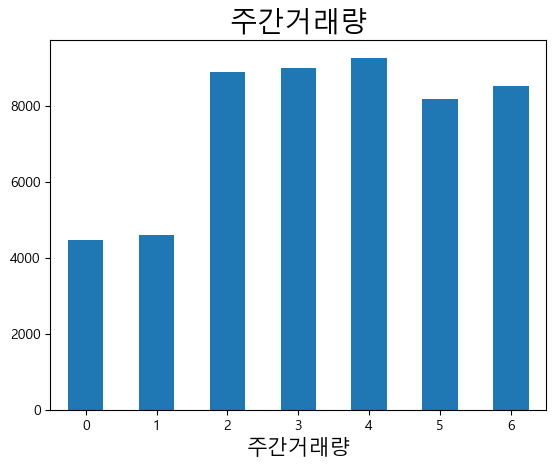

In [95]:
day_table1.groupby('weekday').count()['수량'].plot.bar()
plt.title("주간거래량", fontsize=20)
plt.xlabel("주간거래량", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.show()

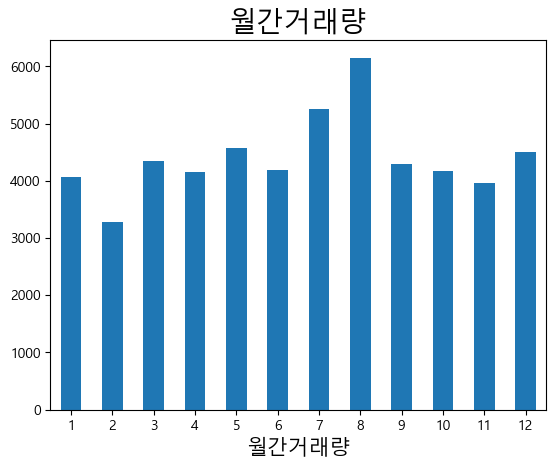

In [99]:
day_table1.groupby('month').count()['수량'].plot.bar()
plt.title("월간거래량", fontsize=20)
plt.xlabel("월간거래량", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.show()

In [175]:
max_purchase_transactions = day_table1.groupby('month').apply(lambda x: x.nlargest(1, '수량'))
selling_by_month_pro = day_table1.loc[selling_by_month.values]

selling_by_month_pro

C:\Users\user\AppData\Local\Temp\ipykernel_24464\1093297251.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_purchase_transactions = day_table1.groupby('month').apply(lambda x: x.nlargest(1, '수량'))


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액,weekday,month
759,USER_1382,Transaction_0346,2019-01-05,Product_0914,Office,516.0,0.99,6.50,Clicked,0.10,Jan,OFF10,10.0,여,California,18,510.84,5,1
5605,USER_0746,Transaction_2872,2019-02-14,Product_0847,Bags,600.0,4.99,6.50,Clicked,0.18,Feb,AIO20,20.0,여,Washington DC,29,2994.00,3,2
8758,USER_1116,Transaction_4424,2019-03-10,Product_0914,Office,300.0,0.79,134.74,Clicked,0.10,Mar,OFF30,30.0,여,New York,10,237.00,6,3
12171,USER_0214,Transaction_5969,2019-04-05,Product_0916,Lifestyle,750.0,3.50,6.50,Used,0.18,Apr,EXTRA10,10.0,남,New Jersey,44,2625.00,4,4
17134,USER_1158,Transaction_8101,2019-05-08,Product_0969,Office,200.0,4.79,100.36,Not Used,0.10,May,OFF20,20.0,여,California,19,958.00,2,5
20976,USER_1081,Transaction_9871,2019-06-05,Product_0914,Office,825.0,0.79,85.33,Used,0.10,Jun,OFF30,30.0,여,New York,45,651.75,2,6
27254,USER_0447,Transaction_12663,2019-07-18,Product_0854,Bags,500.0,4.99,6.00,Clicked,0.18,Jul,AIO10,10.0,여,California,11,2495.00,3,7
30284,USER_0703,Transaction_13749,2019-08-02,Product_0926,Headgear,791.0,13.29,6.00,Used,0.05,Aug,HGEAR20,20.0,남,Chicago,33,10512.39,4,8
36659,USER_0191,Transaction_16322,2019-09-06,Product_0942,Office,350.0,2.00,12.91,Used,0.10,Sep,OFF30,30.0,남,Chicago,45,700.00,4,9
42447,USER_0546,Transaction_19068,2019-10-16,Product_0914,Office,900.0,0.99,12.99,Used,0.10,Oct,OFF10,10.0,여,California,24,891.00,2,10


In [129]:
max_purchase_transactions = day_table1.groupby('month').apply(lambda x: x.nlargest(1, '총_구매금액'))

max_purchase_transactions

C:\Users\user\AppData\Local\Temp\ipykernel_24464\3318474284.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_purchase_transactions = day_table1.groupby('month').apply(lambda x: x.nlargest(1, '총_구매금액'))


,,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액,weekday,month
month,,,,,,,,,,,,,,,,,,,,
1,2961,USER_1358,Transaction_1598,2019-01-24,Product_0858,Bags,20.0,78.40,182.74,Clicked,0.18,Jan,AIO10,10.0,남,Chicago,12,1568.00,3,1
2,5605,USER_0746,Transaction_2872,2019-02-14,Product_0847,Bags,600.0,4.99,6.50,Clicked,0.18,Feb,AIO20,20.0,여,Washington DC,29,2994.00,3,2
3,11138,USER_0370,Transaction_5515,2019-03-28,Product_0952,Office,250.0,10.99,250.01,Clicked,0.10,Mar,OFF30,30.0,여,New York,5,2747.50,3,3
4,12117,USER_0118,Transaction_5967,2019-04-05,Product_0925,Headgear,500.0,18.99,6.50,Used,0.05,Apr,HGEAR10,10.0,여,Chicago,28,9495.00,4,4
5,16732,USER_1167,Transaction_7968,2019-05-05,Product_0926,Headgear,91.0,15.19,25.44,Clicked,0.05,May,HGEAR20,20.0,여,Chicago,32,1382.29,6,5
6,24241,USER_0376,Transaction_11353,2019-06-28,Product_0854,Bags,500.0,4.99,6.00,Not Used,0.18,Jun,AIO30,30.0,여,New Jersey,6,2495.00,4,6
7,27259,USER_0447,Transaction_12663,2019-07-18,Product_0961,Notebooks & Journals,300.0,14.99,6.00,Not Used,0.05,Jul,NJ10,10.0,여,California,11,4497.00,3,7
8,30284,USER_0703,Transaction_13749,2019-08-02,Product_0926,Headgear,791.0,13.29,6.00,Used,0.05,Aug,HGEAR20,20.0,남,Chicago,33,10512.39,4,8
9,37848,USER_0389,Transaction_16759,2019-09-13,Product_0295,Apparel,85.0,16.99,6.00,Clicked,0.18,Sep,SALE30,30.0,여,Washington DC,21,1444.15,4,9


In [114]:
day_table1[day_table1['month'] ==1].describe()


,거래날짜,수량,평균금액,배송료,GST,할인율,가입기간,총_구매금액,weekday,month
count,4063,4063.000000,4063.000000,4063.000000,4063.000000,4023.0,4063.000000,4063.000000,4063.000000,4063.0
mean,2019-01-16 03:10:19.345311232,4.956928,61.756055,14.580930,0.131691,10.0,25.323899,99.341516,3.338174,1.0
min,2019-01-01 00:00:00,1.000000,0.790000,0.000000,0.050000,10.0,2.000000,0.810000,0.000000,1.0
25%,2019-01-08 00:00:00,1.000000,8.240000,6.500000,0.100000,10.0,12.000000,16.500000,2.000000,1.0
50%,2019-01-17 00:00:00,1.000000,22.690000,6.500000,0.100000,10.0,25.000000,63.490000,3.000000,1.0
75%,2019-01-24 00:00:00,2.000000,122.770000,6.500000,0.180000,10.0,38.500000,153.710000,5.000000,1.0
max,2019-01-31 00:00:00,516.000000,256.880000,422.240000,0.180000,10.0,50.000000,1568.000000,6.000000,1.0
std,NaN,19.161699,60.131734,31.640293,0.041632,0.0,13.932981,114.657505,1.735696,0.0


3. 성별에 따른 구분

In [131]:
sales_test3

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,총_구매금액,weekday,month
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,61.89,1,1
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,16.50,1,1
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02,1,1
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,14.02,1,1
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,15.67,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,3.47,1,12
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,16.30,1,12
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,151.88,1,12
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,402.60,1,12


In [195]:
gen_total_purchase = sales_test3.groupby('성별')['총_구매금액'].sum().sort_values(ascending=False).reset_index()
gen_category_count = sales_test3['성별'].value_counts().reset_index()
gen_category_count.columns = ['성별', '카테고리별_구매건수']
gen_average_amount = sales_test3.groupby('성별')['평균금액'].sum().sort_values(ascending=False).reset_index()
gen_quantity_sum = sales_test3.groupby('성별')['수량'].sum().sort_values(ascending=False).reset_index()

gen_category_count.set_index('성별', inplace=True)

gen_table1 = pd.merge(gen_total_purchase, gen_category_count, left_on='성별', right_index=True, how='outer')
gen_table1 = pd.merge(gen_table1, gen_average_amount, on='성별', how='outer')
gen_table1 = pd.merge(gen_table1, gen_quantity_sum, on='성별', how='outer')

gen_table1.columns = ['성별', '총_구매금액', '카테고리별_구매건수', '총_평균금액', '총_수량']
gen_table1

,성별,총_구매금액,카테고리별_구매건수,총_평균금액,총_수량
0,남,1767124.39,19917,1061017.19,86062.0
1,여,2903670.23,33007,1703608.01,151971.0


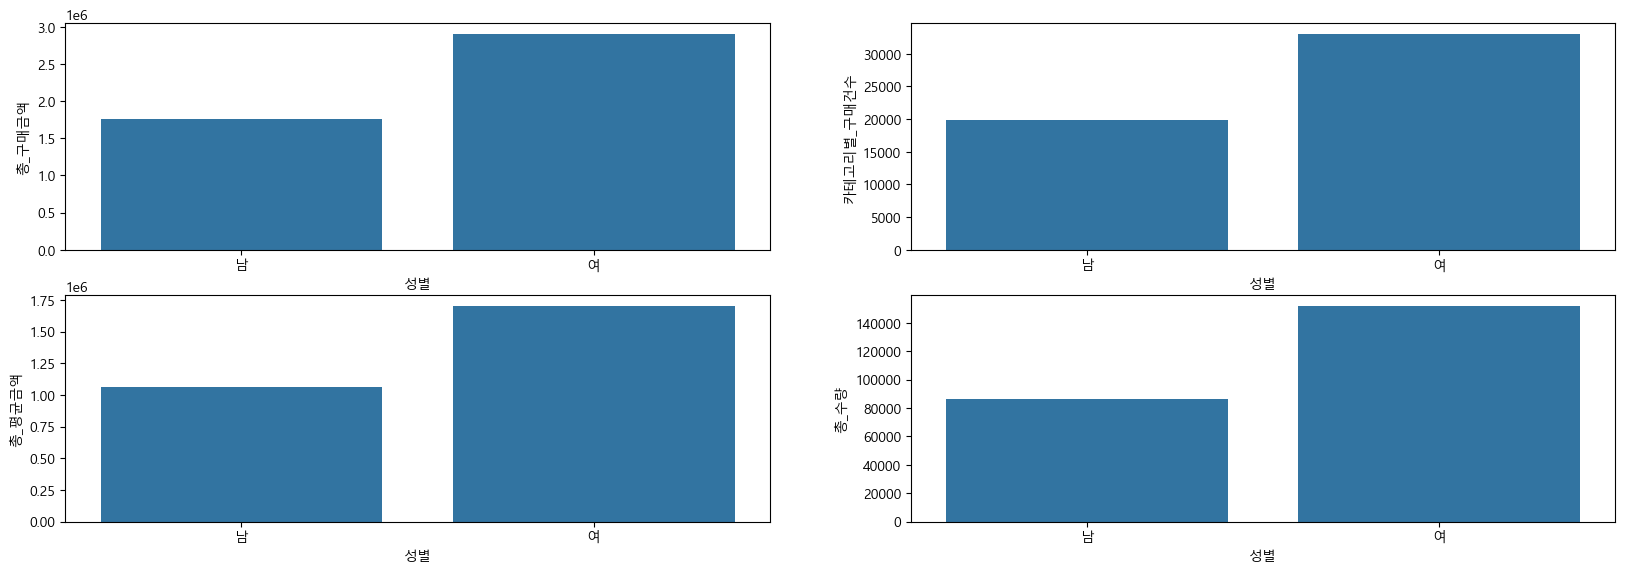

In [164]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
sns.barplot(data=gen_table1, x='성별', y='총_구매금액')
plt.subplot(3, 2, 2)
sns.barplot(data=gen_table1, x='성별',y='카테고리별_구매건수')
plt.subplot(3, 2, 3)
sns.barplot(data=gen_table1, x='성별',y='총_평균금액')
plt.subplot(3, 2, 4)
sns.barplot(data=gen_table1, x='성별',y='총_수량')

plt.show()

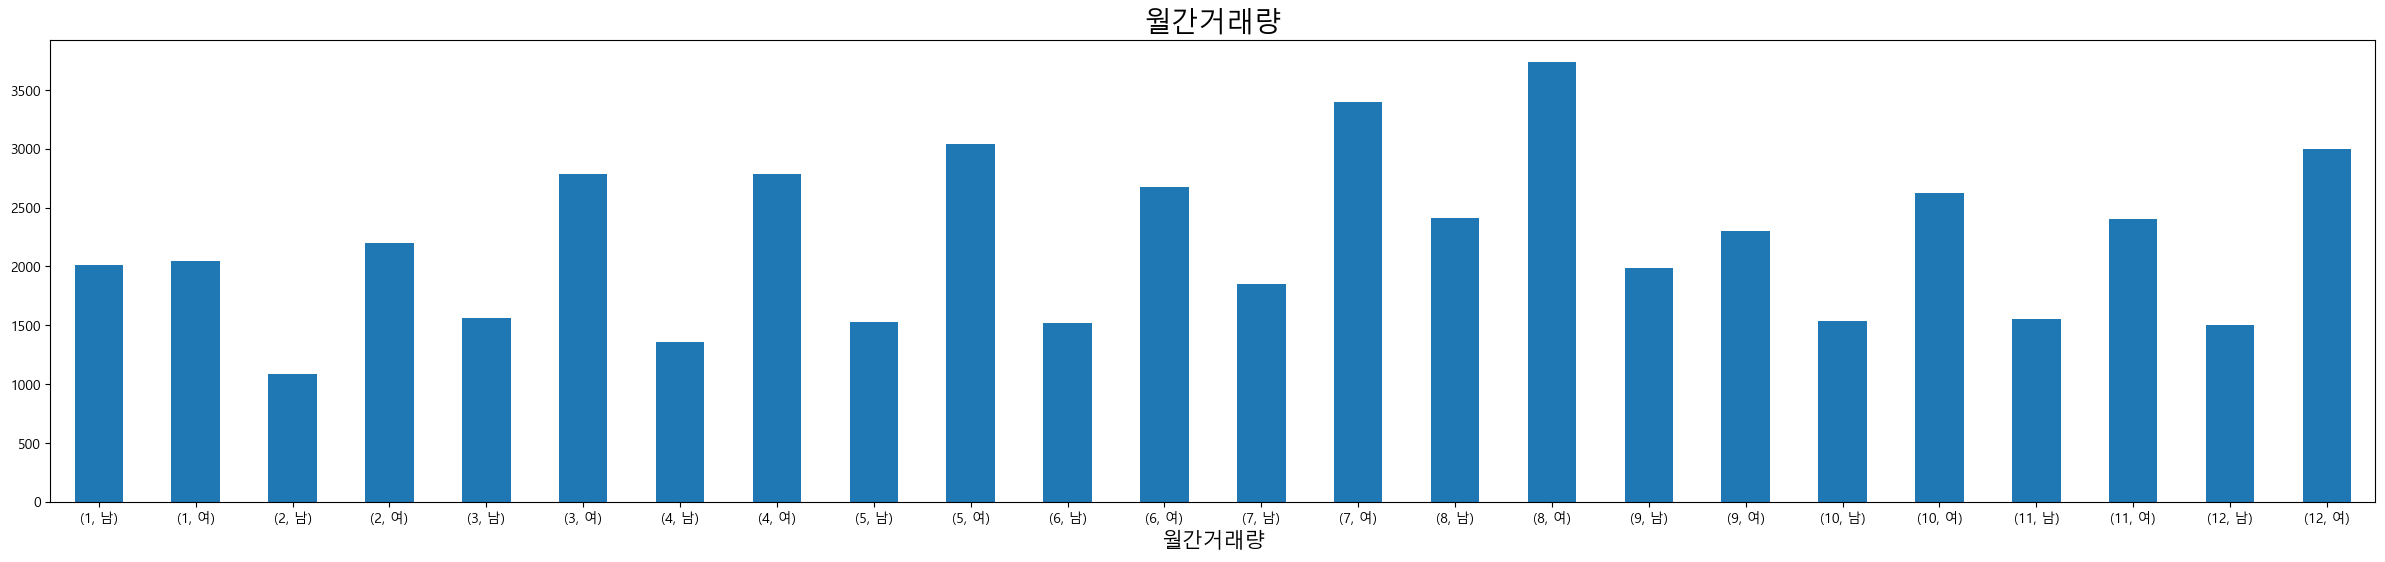

In [171]:
plt.figure(figsize=(30, 6))
plt.title("월간거래량", fontsize=20)
day_table1.groupby(['month','성별']).count()['수량'].plot.bar()
plt.xlabel("월간거래량", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.show()

In [199]:
rei_total_purchase = sales_test3.groupby('고객지역')['총_구매금액'].sum().sort_values(ascending=False).reset_index()
rei_category_count = sales_test3['고객지역'].value_counts().reset_index()
rei_category_count.columns = ['고객지역', '카테고리별_구매건수']
rei_average_amount = sales_test3.groupby('고객지역')['평균금액'].sum().sort_values(ascending=False).reset_index()
rei_quantity_sum = sales_test3.groupby('고객지역')['수량'].sum().sort_values(ascending=False).reset_index()

rei_category_count.set_index('고객지역', inplace=True)

rei_table1 = pd.merge(rei_total_purchase, rei_category_count, left_on='고객지역', right_index=True, how='outer')
rei_table1 = pd.merge(rei_table1, rei_average_amount, on='고객지역', how='outer')
rei_table1 = pd.merge(rei_table1, rei_quantity_sum, on='고객지역', how='outer')

rei_table1.columns = ['고객지역', '총_구매금액', '카테고리별_구매건수', '총_평균금액', '총_수량']
rei_table1

,고객지역,총_구매금액,카테고리별_구매건수,총_평균금액,총_수량
0,California,1442447.31,16136,844933.71,72577.0
1,Chicago,1625885.58,18380,954156.85,83969.0
2,New Jersey,409666.86,4503,239317.78,22677.0
3,New York,937022.63,11173,574321.18,46507.0
4,Washington DC,255772.24,2732,151895.68,12303.0


In [185]:
monthly_gender_category_count = day_table1.groupby(['month', '성별', '제품카테고리']).size().reset_index(name='거래수')
top_categories_per_month_gender = monthly_gender_category_count.groupby(['month','성별']).apply(lambda x: x.nlargest(1, '거래수')).reset_index(drop=True)
top_categories_per_month_gender

C:\Users\user\AppData\Local\Temp\ipykernel_24464\3376781265.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_month_gender = monthly_gender_category_count.groupby(['month','성별']).apply(lambda x: x.nlargest(1, '거래수')).reset_index(drop=True)


,month,성별,제품카테고리,거래수
0,1,남,Nest-USA,829
1,1,여,Nest-USA,734
2,2,남,Nest-USA,336
3,2,여,Nest-USA,719
4,3,남,Apparel,544
5,3,여,Apparel,893
6,4,남,Apparel,551
7,4,여,Apparel,1031
8,5,남,Apparel,658
9,5,여,Apparel,1218


In [192]:
monthly_gender_category_count = day_table1.groupby(['month', '성별', '제품카테고리'])['총_구매금액'].sum().round(0).reset_index(name='총_구매금액')
top_categories_per_month_gender = monthly_gender_category_count.groupby(['month','성별']).apply(lambda x: x.nlargest(1, '총_구매금액')).reset_index(drop=True)
top_categories_per_month_gender

C:\Users\user\AppData\Local\Temp\ipykernel_24464\1690443774.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_month_gender = monthly_gender_category_count.groupby(['month','성별']).apply(lambda x: x.nlargest(1, '총_구매금액')).reset_index(drop=True)


,month,성별,제품카테고리,총_구매금액
0,1,남,Nest-USA,149918.0
1,1,여,Nest-USA,134444.0
2,2,남,Nest-USA,60684.0
3,2,여,Nest-USA,135498.0
4,3,남,Nest-USA,73041.0
5,3,여,Nest-USA,126659.0
6,4,남,Nest-USA,52793.0
7,4,여,Nest-USA,129400.0
8,5,남,Nest-USA,60402.0
9,5,여,Nest-USA,113132.0


In [194]:
monthly_region_category_count = day_table1.groupby(['month', '고객지역', '제품카테고리'])['총_구매금액'].size().reset_index(name='거래수')
top_categories_per_month_region= monthly_region_category_count.groupby(['month','고객지역']).apply(lambda x: x.nlargest(1, '거래수')).reset_index(drop=True)
top_categories_per_month_region

C:\Users\user\AppData\Local\Temp\ipykernel_24464\69656670.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_month_region= monthly_region_category_count.groupby(['month','고객지역']).apply(lambda x: x.nlargest(1, '거래수')).reset_index(drop=True)


,month,고객지역,제품카테고리,거래수
0,1,California,Nest-USA,551
1,1,Chicago,Nest-USA,456
2,1,New Jersey,Nest-USA,115
3,1,New York,Nest-USA,287
4,1,Washington DC,Nest-USA,154
5,2,California,Nest-USA,337
6,2,Chicago,Nest-USA,372
7,2,New Jersey,Nest-USA,97
8,2,New York,Nest-USA,170
9,2,Washington DC,Nest-USA,79


In [193]:
monthly_region_category_count = day_table1.groupby(['month', '고객지역', '제품카테고리'])['총_구매금액'].sum().round(0).reset_index(name='총_구매금액')
top_categories_per_month_region= monthly_region_category_count.groupby(['month','고객지역']).apply(lambda x: x.nlargest(1, '총_구매금액')).reset_index(drop=True)
top_categories_per_month_region

C:\Users\user\AppData\Local\Temp\ipykernel_24464\2081556146.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_month_region= monthly_region_category_count.groupby(['month','고객지역']).apply(lambda x: x.nlargest(1, '총_구매금액')).reset_index(drop=True)


,month,고객지역,제품카테고리,총_구매금액
0,1,California,Nest-USA,100676.0
1,1,Chicago,Nest-USA,81335.0
2,1,New Jersey,Nest-USA,22695.0
3,1,New York,Nest-USA,52254.0
4,1,Washington DC,Nest-USA,27402.0
5,2,California,Nest-USA,62329.0
6,2,Chicago,Nest-USA,67516.0
7,2,New Jersey,Nest-USA,19883.0
8,2,New York,Nest-USA,30937.0
9,2,Washington DC,Nest-USA,15517.0
